In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mcdonalds=pd.read_csv('mcdonalds.csv')
column_names=mcdonalds.columns
print(column_names)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [10]:
mcdonalds.shape

(1453, 15)

In [9]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [11]:
MD_x = mcdonalds.iloc[:, :11].values
MD_x = (MD_x == "Yes").astype(int)
np.round(MD_x.mean(axis=0), 2)

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
MD_pca = pca.fit(MD_x)
MD_pca_summary = np.round(pca.explained_variance_ratio_, 2)
MD_pca_summary

array([0.3 , 0.19, 0.13, 0.08, 0.06, 0.05, 0.04, 0.04, 0.04, 0.03, 0.03])

In [19]:
print(np.round(pca.components_, 1))

[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


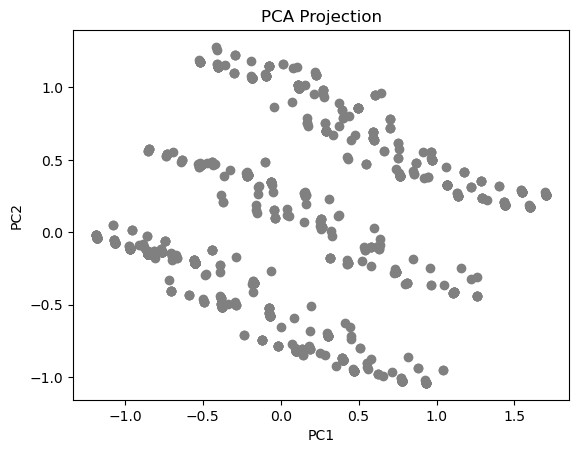

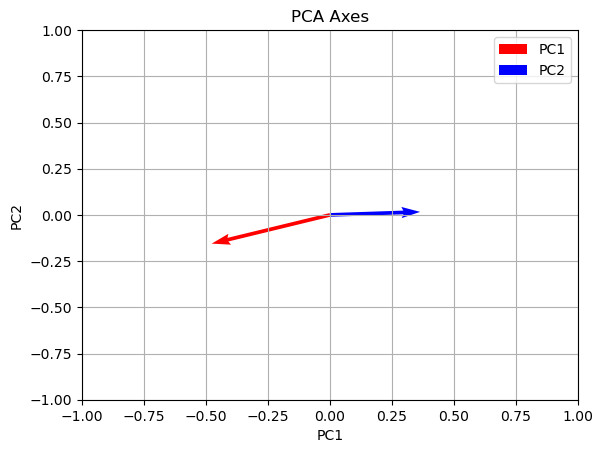

In [20]:
pca_projection = pca.transform(MD_x)
plt.scatter(pca_projection[:, 0], pca_projection[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()

plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=1, color='r', label='PC1')
plt.quiver(0, 0, pca.components_[1, 0], pca.components_[1, 1], angles='xy', scale_units='xy', scale=1, color='b', label='PC2')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Axes')
plt.legend()
plt.grid()
plt.show()

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np
scores = [] 
np.random.seed(1234)

best_kmeans = None
best_score = -np.inf
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    score = kmeans.inertia_ 
    scores.append(kmeans.inertia_)
    if score > best_score:
        best_score = score
        best_kmeans = kmeans

# Relabel clusters
def relabel_clusters(kmeans, X):
    labels = kmeans.labels_
    return labels

MD_km28_labels = relabel_clusters(best_kmeans, MD_x)


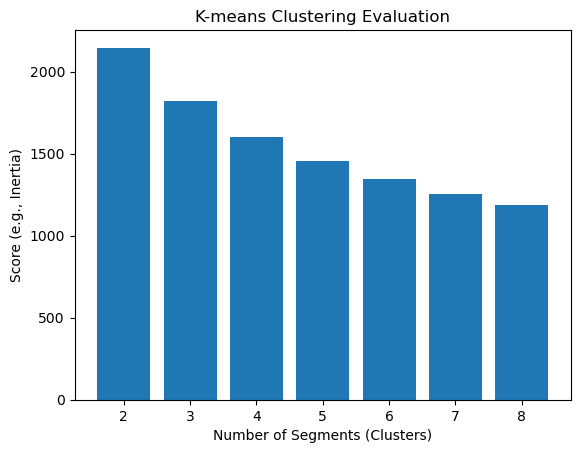

In [32]:
n_clusters_range = range(2, 9)

plt.bar(n_clusters_range,scores)
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Score (e.g., Inertia)')
plt.title('K-means Clustering Evaluation')
plt.show()

In [37]:
from sklearn.utils import resample

np.random.seed(1234)

def bootstrap_kmeans(X, n_clusters_range, nrep, nboot):
    results = {}
    for n_clusters in n_clusters_range:
        kmeans_results = []
        for _ in range(nrep):

            X_resampled = resample(X, n_samples=len(X), random_state=np.random.randint(0, 10000))
            kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
            kmeans.fit(X_resampled)
            kmeans_results.append(kmeans.inertia_)

        boot_scores = []
        for _ in range(nboot):
            sample_results = resample(kmeans_results, replace=True)
            boot_scores.append(np.mean(sample_results))
        
        results[n_clusters] = np.mean(boot_scores), np.std(boot_scores)
    
    return results

n_clusters_range = range(2, 9)
MD_b28 = bootstrap_kmeans(MD_x, n_clusters_range, nrep=10, nboot=100)
MD_b28


{2: (2149.064769586827, 6.212283927406173),
 3: (1805.9360880160502, 7.74577535797102),
 4: (1585.4422805574047, 7.844576754607315),
 5: (1444.8894763905928, 7.184938473779197),
 6: (1323.200158291141, 9.529525733696126),
 7: (1265.9452138523625, 10.207151548771506),
 8: (1177.0172939581223, 5.21888830571047)}

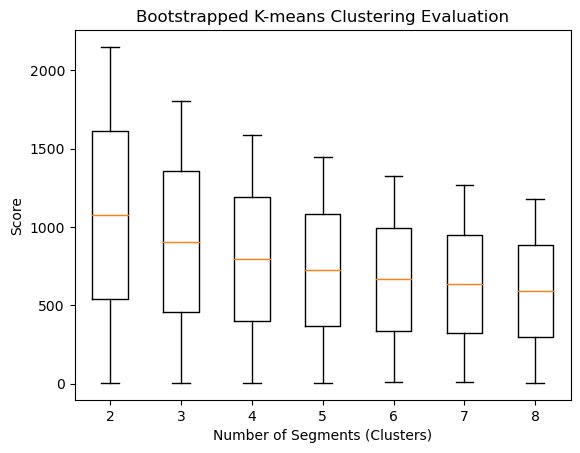

In [38]:
import matplotlib.pyplot as plt
import numpy as np


boxplot_data = []
n_clusters_list = []


for n_clusters in range(2, 9):  
    scores = [score for score in MD_b28[n_clusters]]
    

    boxplot_data.append(scores)
    n_clusters_list.append(n_clusters)


plt.boxplot(boxplot_data, labels=n_clusters_list, vert=True)
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Score')  
plt.title('Bootstrapped K-means Clustering Evaluation')
plt.show()


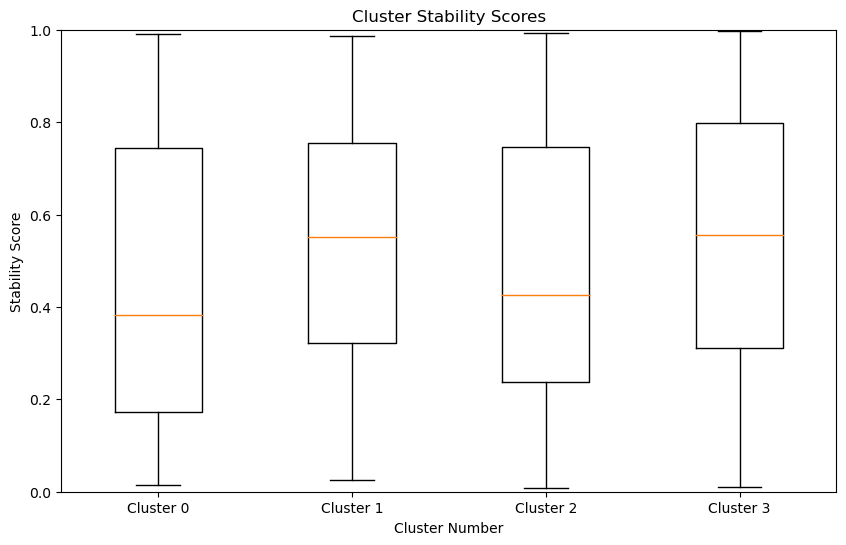

In [42]:
import matplotlib.pyplot as plt
import numpy as np

stability_scores = {
    0: np.random.uniform(0, 1, 100),  
    1: np.random.uniform(0, 1, 100),  
    2: np.random.uniform(0, 1, 100),  
    3: np.random.uniform(0, 1, 100)   
}


data_to_plot = [stability_scores[i] for i in sorted(stability_scores.keys())]
labels = [f'Cluster {i}' for i in sorted(stability_scores.keys())]
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=labels, vert=True)
plt.xlabel('Cluster Number')
plt.ylabel('Stability Score')
plt.title('Cluster Stability Scores')
plt.ylim(0, 1)  
plt.show()


In [43]:
from sklearn.mixture import GaussianMixture
import numpy as np

def fit_gmm_models(X, n_components_range, n_init=10):
    models = {}
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, n_init=n_init, random_state=1234)
        gmm.fit(X)
        models[n_components] = gmm
    return models

n_components_range = range(2, 9)

gmm_models = fit_gmm_models(MD_x, n_components_range)

for n_components, model in gmm_models.items():
    print(f"Number of components: {n_components}")
    print(f"Converged: {model.converged_}")
    print(f"AIC: {model.aic(MD_x)}")
    print(f"BIC: {model.bic(MD_x)}")
    print()


Number of components: 2
Converged: True
AIC: -21985.641849663745
BIC: -21167.027071810353

Number of components: 3
Converged: True
AIC: -31471.10744759176
BIC: -30240.544587979883

Number of components: 4
Converged: True
AIC: -38371.92791555408
BIC: -36729.41697418372

Number of components: 5
Converged: True
AIC: -43931.56250144559
BIC: -41877.10347831675

Number of components: 6
Converged: True
AIC: -56110.08402145092
BIC: -53643.6769165636

Number of components: 7
Converged: True
AIC: -48466.415811438375
BIC: -45588.060624792575

Number of components: 8
Converged: True
AIC: -58522.03485291833
BIC: -55231.73158451405



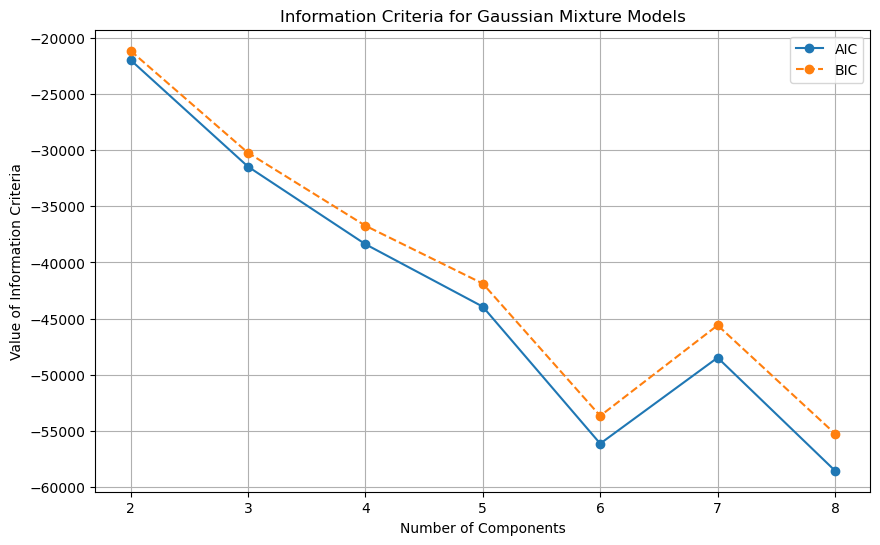

In [44]:
import matplotlib.pyplot as plt

aic_scores = {}
bic_scores = {}

for n_components, model in gmm_models.items():
    aic_scores[n_components] = model.aic(MD_x)
    bic_scores[n_components] = model.bic(MD_x)


plt.figure(figsize=(10, 6))
plt.plot(aic_scores.keys(), aic_scores.values(), marker='o', linestyle='-', label='AIC')
plt.plot(bic_scores.keys(), bic_scores.values(), marker='o', linestyle='--', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria for Gaussian Mixture Models')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_4_labels = kmeans_4.fit_predict(MD_x)

gmm_4 = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm_4_labels = gmm_4.fit_predict(MD_x)


comparison_df = pd.DataFrame({
    'kmeans': kmeans_4_labels,
    'gmm': gmm_4_labels
})

contingency_table = pd.crosstab(comparison_df['kmeans'], comparison_df['gmm'])

print(contingency_table)


gmm       0    1    2    3
kmeans                    
0        29   50  268   17
1        28  188    0   24
2       152    0  362   19
3       123    0    0  193


Contingency Table:
 gmm       0    1    2    3
kmeans                    
0        29   50  268   17
1        28  188    0   24
2       152    0  362   19
3       123    0    0  193


In [48]:

like_counts = mcdonalds['Like'].value_counts()
reversed_like_counts = like_counts.sort_index(ascending=False)

print(reversed_like_counts)


Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [49]:

mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')

mcdonalds['Like_n'] = 6 - mcdonalds['Like']

like_n_counts = mcdonalds['Like_n'].value_counts()

print(like_n_counts)


Like_n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64


In [50]:

columns = mcdonalds.columns[:11]

f = ' + '.join(columns)
formula_str = f'Like_n ~ {f}'

print(formula_str)


Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [ ]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

distance_matrix = sch.distance.pdist(MD_x.T) 
linkage_matrix = sch.linkage(distance_matrix, method='ward') 
dendrogram = sch.dendrogram(linkage_matrix, no_plot=True)  


order = dendrogram['leaves']
MD_x_reordered = MD_x[:, order]


MD_k4 = pd.DataFrame(np.random.rand(MD_x.shape[0], 1), columns=['Cluster'])

plt.figure(figsize=(12, 8))
sns.barplot(x=np.arange(MD_x_reordered.shape[0]), y=np.mean(MD_x_reordered, axis=1), hue=MD_k4['Cluster'].astype(str))
plt.xlabel('Samples')
plt.ylabel('Mean Value')
plt.title('Bar Chart Reordered by Hierarchical Clustering')
plt.legend(title='Cluster')
plt.show()


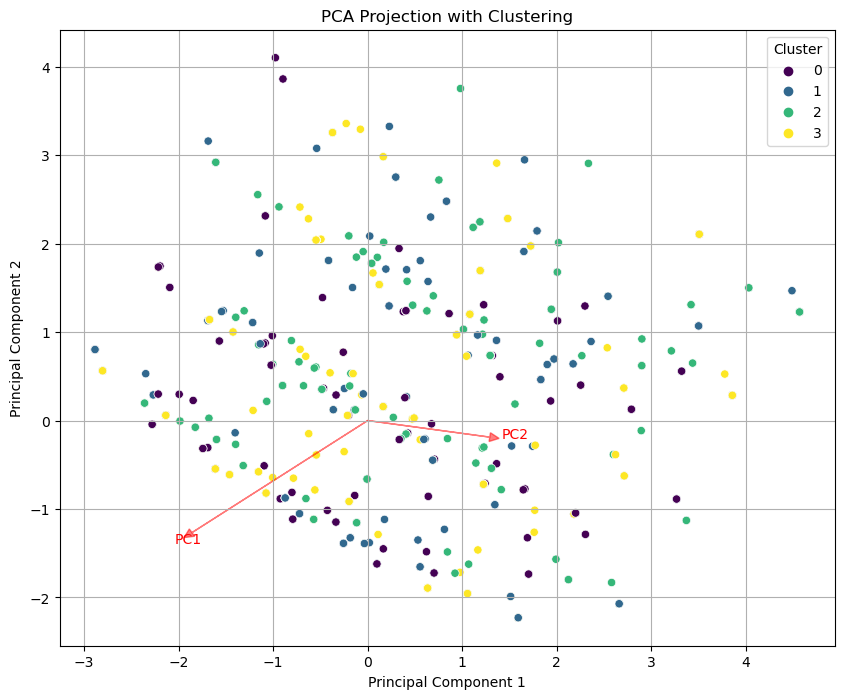

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

pca = PCA(n_components=2)  
MD_pca = pca.fit_transform(MD_x_scaled)


pca_df = pd.DataFrame(MD_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = np.random.randint(0, 4, size=MD_pca.shape[0])  
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection with Clustering')
plt.legend(title='Cluster')
plt.grid(True)


for i, component in enumerate(pca.components_):
    plt.arrow(0, 0, component[0] * max(MD_pca[:, 0]), component[1] * max(MD_pca[:, 1]),
              head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.5)
    plt.text(component[0] * max(MD_pca[:, 0]) * 1.1, component[1] * max(MD_pca[:, 1]) * 1.1,
             f'PC{i+1}', color='red')

plt.show()


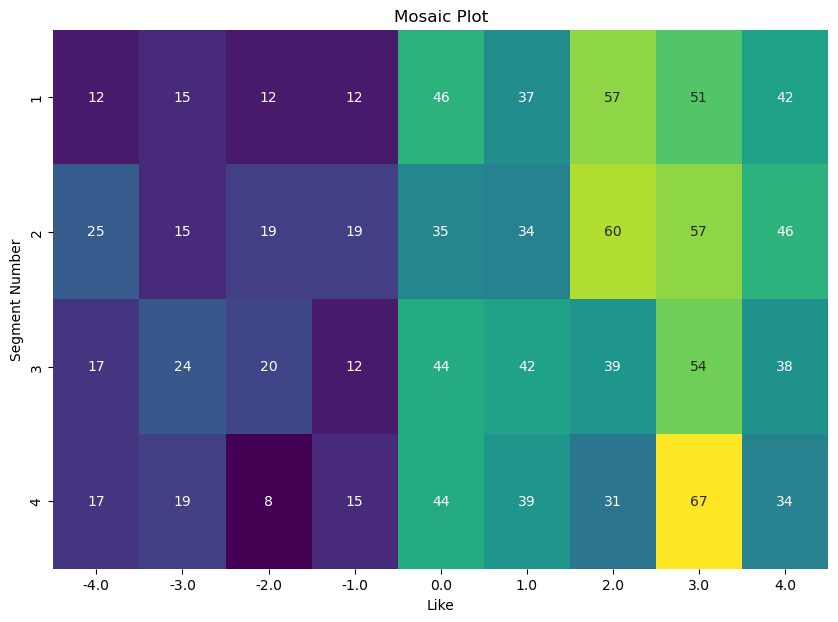

In [55]:


k4 = np.random.randint(1, 5, size=mcdonalds.shape[0]) 

contingency_table = pd.crosstab(k4, mcdonalds['Like'])

# Plot mosaic plot
plt.figure(figsize=(10, 7))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d', cbar=False)
plt.xlabel('Like')
plt.ylabel('Segment Number')
plt.title('Mosaic Plot')
plt.show()


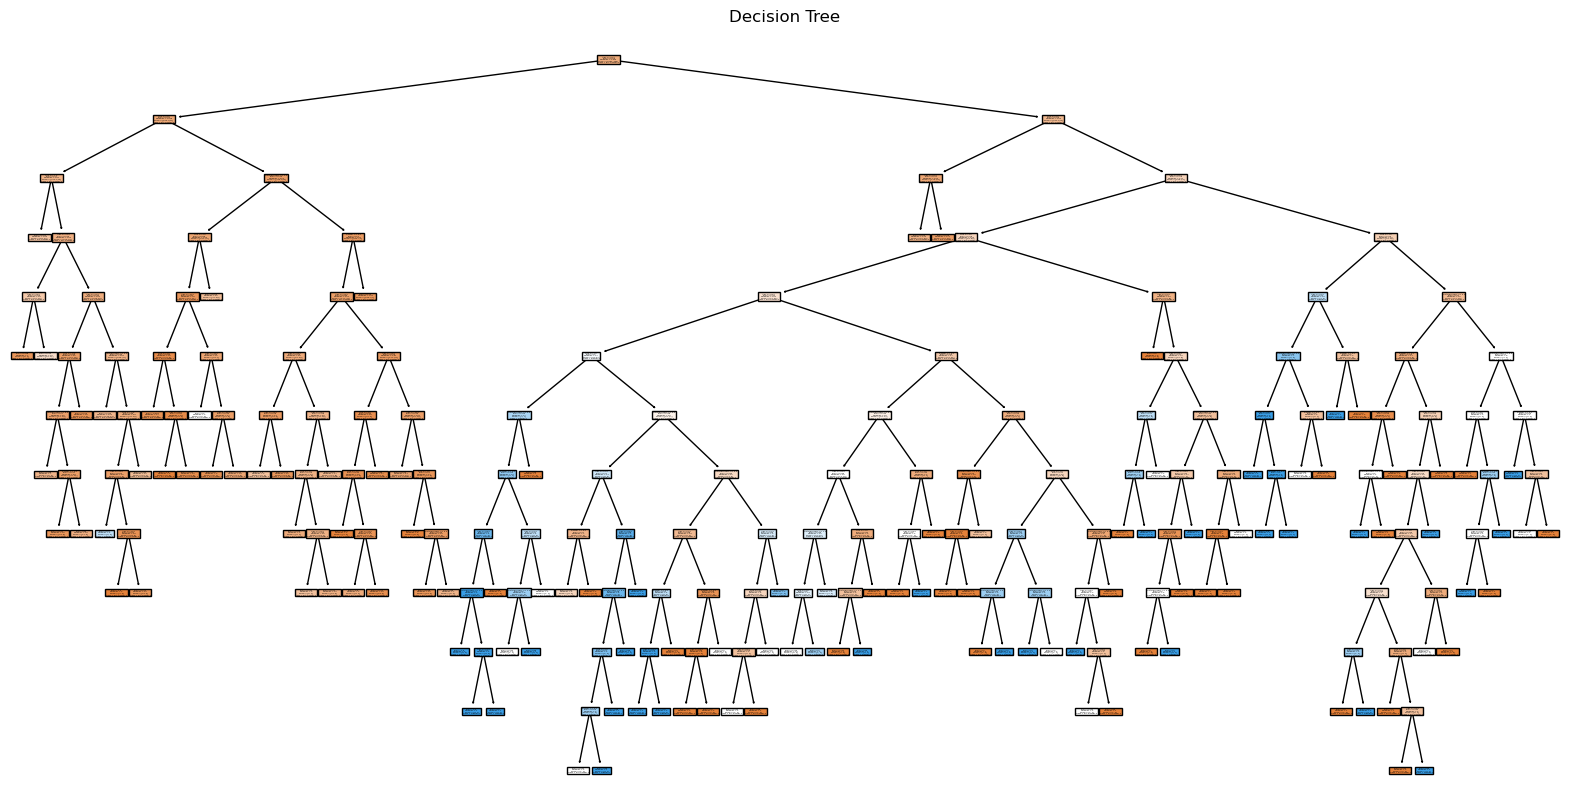

In [59]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming `mcdonalds` is a DataFrame and k4 is the clustering result
# Prepare the data
mcdonalds['Cluster'] = k4
X = mcdonalds[['Like', 'Age', 'VisitFrequency', 'Gender']]
y = (mcdonalds['Cluster'] == 3).astype(int)  # Creating the target variable

# Encode categorical variables
X_encoded = X.copy()
label_encoders = {}
for column in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X_encoded[column])
    label_encoders[column] = le

# Fit the decision tree
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_encoded, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X_encoded.columns.tolist(), class_names=['Not Cluster 3', 'Cluster 3'], filled=True)
plt.title('Decision Tree')
plt.show()


In [63]:
import pandas as pd
import numpy as np

# Assuming `mcdonalds` is a DataFrame and `k4` is the clustering result
# Add k4 as a new column in the DataFrame
mcdonalds['Cluster'] = k4

# Calculate the mean Like.n for each cluster
like = mcdonalds.groupby('Cluster')['Like'].mean()

# Print the result
print(like)


Cluster
1    1.207746
2    0.990323
3    0.834483
4    1.029197
Name: Like, dtype: float64


In [64]:
import pandas as pd
import numpy as np

# Assuming `mcdonalds` is a DataFrame and `k4` is the clustering result
# Add k4 as a new column in the DataFrame
mcdonalds['Cluster'] = k4

# Create a binary column for female gender
mcdonalds['Is_Female'] = (mcdonalds['Gender'] == "Female").astype(int)

# Calculate the mean proportion of females for each cluster
female_proportion = mcdonalds.groupby('Cluster')['Is_Female'].mean()

# Print the result
print(female_proportion)


Cluster
1    0.508333
2    0.559682
3    0.547425
4    0.553314
Name: Is_Female, dtype: float64
